# Dağılım Grafikleri

#### Barplot
##### Veri Setimizin Hikayesi

* price dolar cinsinde fiyat (326-18,823)

* carat: ağırlık (0.2-5.01)

* cut: kalite (Fair, Good, Very Good, Premium, Ideal)

* color: renk (D(best), E, F, G, H, I, J(worst))

* clarity: temizlik,berraklık (I1(worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF(best))

* x: mm cinsinden uzunluk (0-10.74)

* y: mm cinsinden genişlik (0-58.9)

* z: mm cinsinden derinlik (0-31.8)

* depth: mm cinsinden derinlik yüzdesi: z/mean(x,y) ) 2*z/mean(x,y) (43-79)

* table: mm cinsinden tablo boyutu: (43-95)

In [1]:
import seaborn as sns
diamonds = sns.load_dataset('diamonds')
df = diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [5]:
df["price"].value_counts()

price
605      132
802      127
625      126
828      125
776      124
        ... 
8816       1
14704      1
14699      1
14698      1
9793       1
Name: count, Length: 11602, dtype: int64

In [6]:
df["cut"].value_counts()

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

In [7]:
# ordinal tanımlama 
from pandas.api.types import CategoricalDtype

In [8]:
df.cut.head() 

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: category
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In [11]:
df.cut =  df.cut.astype(CategoricalDtype(ordered = True))

In [12]:
df.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [14]:
df.cut.head(1) # yanlış bir sıralama oluyor çünki belirtmiyoruz

0    Ideal
Name: cut, dtype: category
Categories (5, object): ['Ideal' < 'Premium' < 'Very Good' < 'Good' < 'Fair']

In [15]:
cut_kategoriler = ["Fair","Good","Very Good","Premium","Ideal"]

In [16]:
df.cut = df.cut.astype(CategoricalDtype(categories = cut_kategoriler, ordered = True))

In [18]:
df.cut.head(1) # istenen sıralamaya göre sıralandı

0    Ideal
Name: cut, dtype: category
Categories (5, object): ['Fair' < 'Good' < 'Very Good' < 'Premium' < 'Ideal']

In [19]:
df.clarity.head()

0    SI2
1    SI1
2    VS1
3    VS2
4    SI2
Name: clarity, dtype: category
Categories (8, object): ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']

In [20]:
claritiy_kategoriler = ["I1","SI2","SI1","VS2","VS1","VVS2","VVS1","IF"]

In [21]:
df.clarity = df.clarity.astype(CategoricalDtype(categories = claritiy_kategoriler, ordered = True))

In [22]:
df.clarity 

0        SI2
1        SI1
2        VS1
3        VS2
4        SI2
        ... 
53935    SI1
53936    SI1
53937    SI1
53938    SI2
53939    SI2
Name: clarity, Length: 53940, dtype: category
Categories (8, object): ['I1' < 'SI2' < 'SI1' < 'VS2' < 'VS1' < 'VVS2' < 'VVS1' < 'IF']

In [23]:
df.color = df.color.astype(CategoricalDtype(ordered=True))

In [24]:
df.color.head(1) # renkler sıralandı

0    E
Name: color, dtype: category
Categories (7, object): ['D' < 'E' < 'F' < 'G' < 'H' < 'I' < 'J']

In [26]:
color_kategoriler = ["J","I","H","G","F","E","D"]

In [27]:
df.color = df.color.astype(CategoricalDtype(categories = color_kategoriler, ordered = True))

In [28]:
df.color

0        E
1        E
2        E
3        I
4        J
        ..
53935    D
53936    D
53937    D
53938    H
53939    D
Name: color, Length: 53940, dtype: category
Categories (7, object): ['J' < 'I' < 'H' < 'G' < 'F' < 'E' < 'D']

## Sütun Grafiği / barplot

*barplot*, kategorik değişkenlerin ortalama değerlerini gösteren bir sütun (bar) grafiğidir. Seaborn'un barplot() fonksiyonu, her kategoriye ait değerlerin ortalamasını hesaplayarak sütunların yüksekliğini belirler ve isteğe bağlı olarak hata paylarını (confidence interval, CI) gösterebilir.

Kullanım Alanları:

* Kategorik değişkenlere ait ortalama değerleri göstermek için kullanılır.
* Gruplar arası karşılaştırmalar yapmaya olanak tanır.
* Zaman serileri veya kategori bazlı metriklerin özetlenmesi için uygundur.

Özellikler:

* Varsayılan olarak barplot, ortalama (mean) değerleri gösterir.
* estimator parametresi ile ortalama yerine toplam (sum), medyan (median) veya başka bir istatistiksel ölçü kullanılabilir.
* Hata çubukları (confidence intervals, CI) varsayılan olarak çizilir ve standart hatayı (standard error) gösterir. ci=None ile kapatılabilir.
* Renk, düzen, eksenlerin özelleştirilmesi gibi birçok stil değişikliği yapılabilir.

Text(0.5, 1.0, 'Cut Değişkeni Sınıf Freakansları')

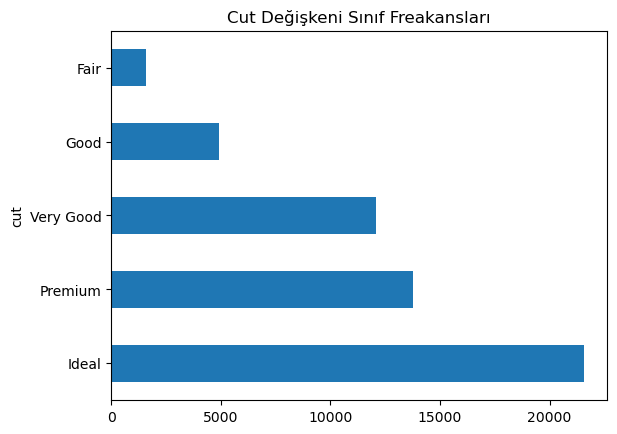

In [33]:
# pandas ile görselleştirme
df["cut"].value_counts().plot.barh().set_title("Cut Değişkeni Sınıf Freakansları")

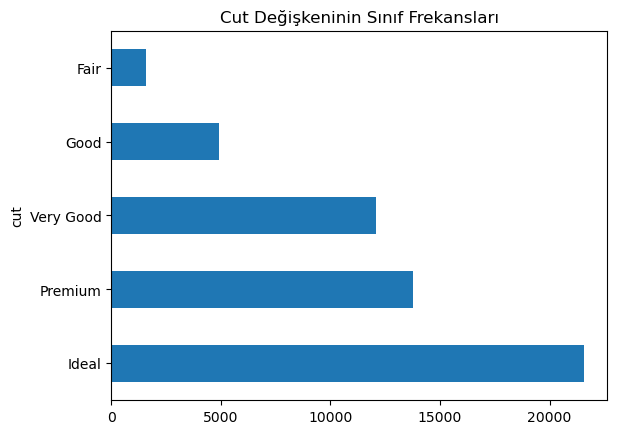

In [34]:
(df["cut"]
.value_counts()
.plot.barh()
.set_title("Cut Değişkeninin Sınıf Frekansları"));
# Bu şekilde de güzel görünsün diye yazılabilir

<Axes: xlabel='cut', ylabel='None'>

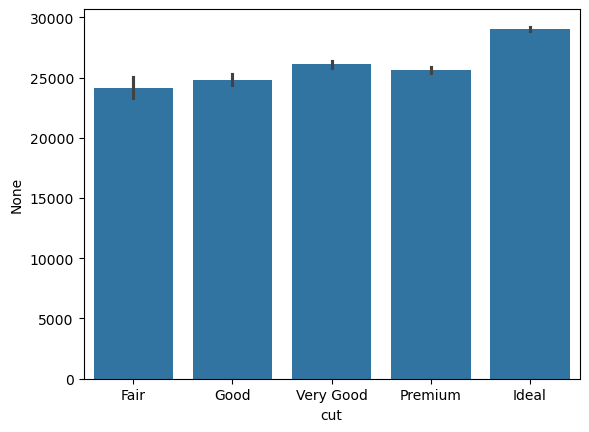

In [37]:
# seaborn ile görselleştirme
sns.barplot(x = "cut", y = df.cut.index, data = df)